<a href="https://colab.research.google.com/github/fergal303/fergal303/blob/master/DaProjcet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os

# Read in C3D files...

..and build the DataFrame one row at a time...

In [ ]:
from os import listdir
from os.path import isfile, join
import pandas as pd

os.chdir('/content/drive/MyDrive/DCUCA684/CA684_Assignment/Dev-set/C3D/')

print('__01__')
fi = [f for f in listdir('.')]
print('__02__')

f = pd.DataFrame()
cnt = 0
for i in fi:
    cnt=cnt+1
    print(cnt,'_',i)
    df = pd.read_csv(i, header=None, sep=' ',)
    ser = df.iloc[0]
    ser.name = i
    f = f.append(ser)
    if cnt==1000:
      break
print('__03__')

In [ ]:
f.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
video6632.txt,0.010858,0.010386,0.000000,0.000000e+00,0.000000e+00,0.000000,2.700000e-07,0.000000,1.000000e-08,3.400000e-07,8.000000e-08,1.000000e-08,0.000004,0.000105,0.000000e+00,4.000000e-08,1.000000e-08,0.000000,0.000000,1.331800e-04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.600000e-07,0.000000,9.800000e-07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,6.000000e-08,0.000021,5.000000e-08,0.000000e+00,1.000000e-08,3.000000e-08,2.000000e-08,0.000000e+00,...,0.970125,0.000016,0.001298,0.000032,0.000001,0.000000,0.000000,1.000000e-08,2.500000e-07,0.000000e+00,0.000000,5.000000e-08,0.000000,1.000000e-08,1.000000e-08,4.200000e-07,0.000000e+00,3.000000e-08,2.000000e-08,0.000000,0.000000,0.000000,6.000000e-08,0.000000,0.000000,9.000000e-08,0.000000,0.000000e+00,1.100000e-07,1.400000e-07,0.000000,0.000000,1.700000e-07,0.000000,0.000000e+00,1.000000e-08,1.300000e-06,2.600000e-06,8.000000e-08,NaN
video6634.txt,0.000200,0.000065,0.993807,2.000000e-07,4.700000e-07,0.000073,3.700000e-06,0.000337,6.710000e-06,2.290000e-06,6.380000e-06,7.340000e-06,0.000019,0.000007,3.240000e-06,3.810000e-06,1.411000e-05,0.000001,0.000003,2.300000e-07,1.900000e-07,0.002938,5.200000e-07,9.200000e-07,1.136000e-05,0.000011,3.310400e-04,9.200000e-07,0.000022,8.000000e-08,0.000028,0.000013,5.778000e-05,0.000037,1.683000e-05,6.860000e-06,3.990000e-06,8.030000e-06,1.450000e-06,3.800000e-07,...,0.000027,0.000013,0.000077,0.000050,0.000138,0.000012,0.000007,4.100000e-07,5.440000e-06,3.400000e-07,0.000007,8.399000e-05,0.000004,3.970000e-06,5.900000e-07,1.285300e-04,8.800000e-07,2.228000e-05,1.105000e-05,0.000003,0.000015,0.000014,4.090000e-06,0.000003,0.000005,4.920000e-06,0.000005,6.400000e-07,2.372000e-05,6.610000e-06,0.000010,0.000002,5.800000e-06,0.000001,1.490000e-06,1.170000e-05,1.500000e-07,8.300000e-07,1.060000e-04,NaN
video6633.txt,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000008,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.999985,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.120000e-06,NaN
video6645.txt,0.005959,0.004765,0.003757,5.787100e-04,7.344000e-05,0.000129,4.665300e-04,0.010266,3.028100e-04,2.196500e-04,2.521800e-04,2.963730e-03,0.000032,0.000592,3.260000e-05,1.466430e-03,2.430700e-04,0.000181,0.004019,2.390960e-03,1.206900e-04,0.008488,5.216200e-04,4.164600e-04,1.643420e-02,0.049686,1.470550e-03,5.432000e-05,0.001055,5.442770e-03,0.000173,0.024688,9.640700e-04,0.000880,1.140529e-02,4.522160e-03,8.594500e-04,6.573000e-04,6.942400e-04,1.823110e-03,...,0.000639,0.014109,0.000472,0.002461,0.004046,0.000905,0.000997,2.514660e-03,1.587440e-03,1.125030e-03,0.001008,2.133877e-02,0.000647,1.373010e-03,9.568000e-05,5.635083e-02,1.628000e-05,5.379910e-03,6.020020e-03,0.046499,0.023942,0.020658,3.349520e-03,0.002637,0.000094,1.170705e-02,0.000229,9.789210e-03,2.764390e-03,8.052350e-03,0.003992,0.004137,3.670390e-02,0.000767,3.692100e-04,1.251980e-02,8.422000e-05,1.159825e-02,1.155040e-03,NaN
video6643.txt,0.005782,0.000306,0.004011,1.007000e-05,1.034000e-05,0.000002,3.160000e-06,0.0000

...lose the `.txt` suffix on the index...

In [ ]:
f.index = f.index.str.replace('.txt', '')
#f=f.dropna(axis=1)

f.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
video6632,0.010858,0.010386,0.000000,0.000000e+00,0.000000e+00,0.000000,2.700000e-07,0.000000,1.000000e-08,3.400000e-07,8.000000e-08,1.000000e-08,0.000004,0.000105,0.000000e+00,4.000000e-08,1.000000e-08,0.000000,0.000000,1.331800e-04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.600000e-07,0.000000,9.800000e-07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,6.000000e-08,0.000021,5.000000e-08,0.000000e+00,1.000000e-08,3.000000e-08,2.000000e-08,0.000000e+00,...,0.970125,0.000016,0.001298,0.000032,0.000001,0.000000,0.000000,1.000000e-08,2.500000e-07,0.000000e+00,0.000000,5.000000e-08,0.000000,1.000000e-08,1.000000e-08,4.200000e-07,0.000000e+00,3.000000e-08,2.000000e-08,0.000000,0.000000,0.000000,6.000000e-08,0.000000,0.000000,9.000000e-08,0.000000,0.000000e+00,1.100000e-07,1.400000e-07,0.000000,0.000000,1.700000e-07,0.000000,0.000000e+00,1.000000e-08,1.300000e-06,2.600000e-06,8.000000e-08,NaN
video6634,0.000200,0.000065,0.993807,2.000000e-07,4.700000e-07,0.000073,3.700000e-06,0.000337,6.710000e-06,2.290000e-06,6.380000e-06,7.340000e-06,0.000019,0.000007,3.240000e-06,3.810000e-06,1.411000e-05,0.000001,0.000003,2.300000e-07,1.900000e-07,0.002938,5.200000e-07,9.200000e-07,1.136000e-05,0.000011,3.310400e-04,9.200000e-07,0.000022,8.000000e-08,0.000028,0.000013,5.778000e-05,0.000037,1.683000e-05,6.860000e-06,3.990000e-06,8.030000e-06,1.450000e-06,3.800000e-07,...,0.000027,0.000013,0.000077,0.000050,0.000138,0.000012,0.000007,4.100000e-07,5.440000e-06,3.400000e-07,0.000007,8.399000e-05,0.000004,3.970000e-06,5.900000e-07,1.285300e-04,8.800000e-07,2.228000e-05,1.105000e-05,0.000003,0.000015,0.000014,4.090000e-06,0.000003,0.000005,4.920000e-06,0.000005,6.400000e-07,2.372000e-05,6.610000e-06,0.000010,0.000002,5.800000e-06,0.000001,1.490000e-06,1.170000e-05,1.500000e-07,8.300000e-07,1.060000e-04,NaN
video6633,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000008,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.999985,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.120000e-06,NaN
video6645,0.005959,0.004765,0.003757,5.787100e-04,7.344000e-05,0.000129,4.665300e-04,0.010266,3.028100e-04,2.196500e-04,2.521800e-04,2.963730e-03,0.000032,0.000592,3.260000e-05,1.466430e-03,2.430700e-04,0.000181,0.004019,2.390960e-03,1.206900e-04,0.008488,5.216200e-04,4.164600e-04,1.643420e-02,0.049686,1.470550e-03,5.432000e-05,0.001055,5.442770e-03,0.000173,0.024688,9.640700e-04,0.000880,1.140529e-02,4.522160e-03,8.594500e-04,6.573000e-04,6.942400e-04,1.823110e-03,...,0.000639,0.014109,0.000472,0.002461,0.004046,0.000905,0.000997,2.514660e-03,1.587440e-03,1.125030e-03,0.001008,2.133877e-02,0.000647,1.373010e-03,9.568000e-05,5.635083e-02,1.628000e-05,5.379910e-03,6.020020e-03,0.046499,0.023942,0.020658,3.349520e-03,0.002637,0.000094,1.170705e-02,0.000229,9.789210e-03,2.764390e-03,8.052350e-03,0.003992,0.004137,3.670390e-02,0.000767,3.692100e-04,1.251980e-02,8.422000e-05,1.159825e-02,1.155040e-03,NaN
video6643,0.005782,0.000306,0.004011,1.007000e-05,1.034000e-05,0.000002,3.160000e-06,0.000003,1.984000e-05,5.75

# HeatMap

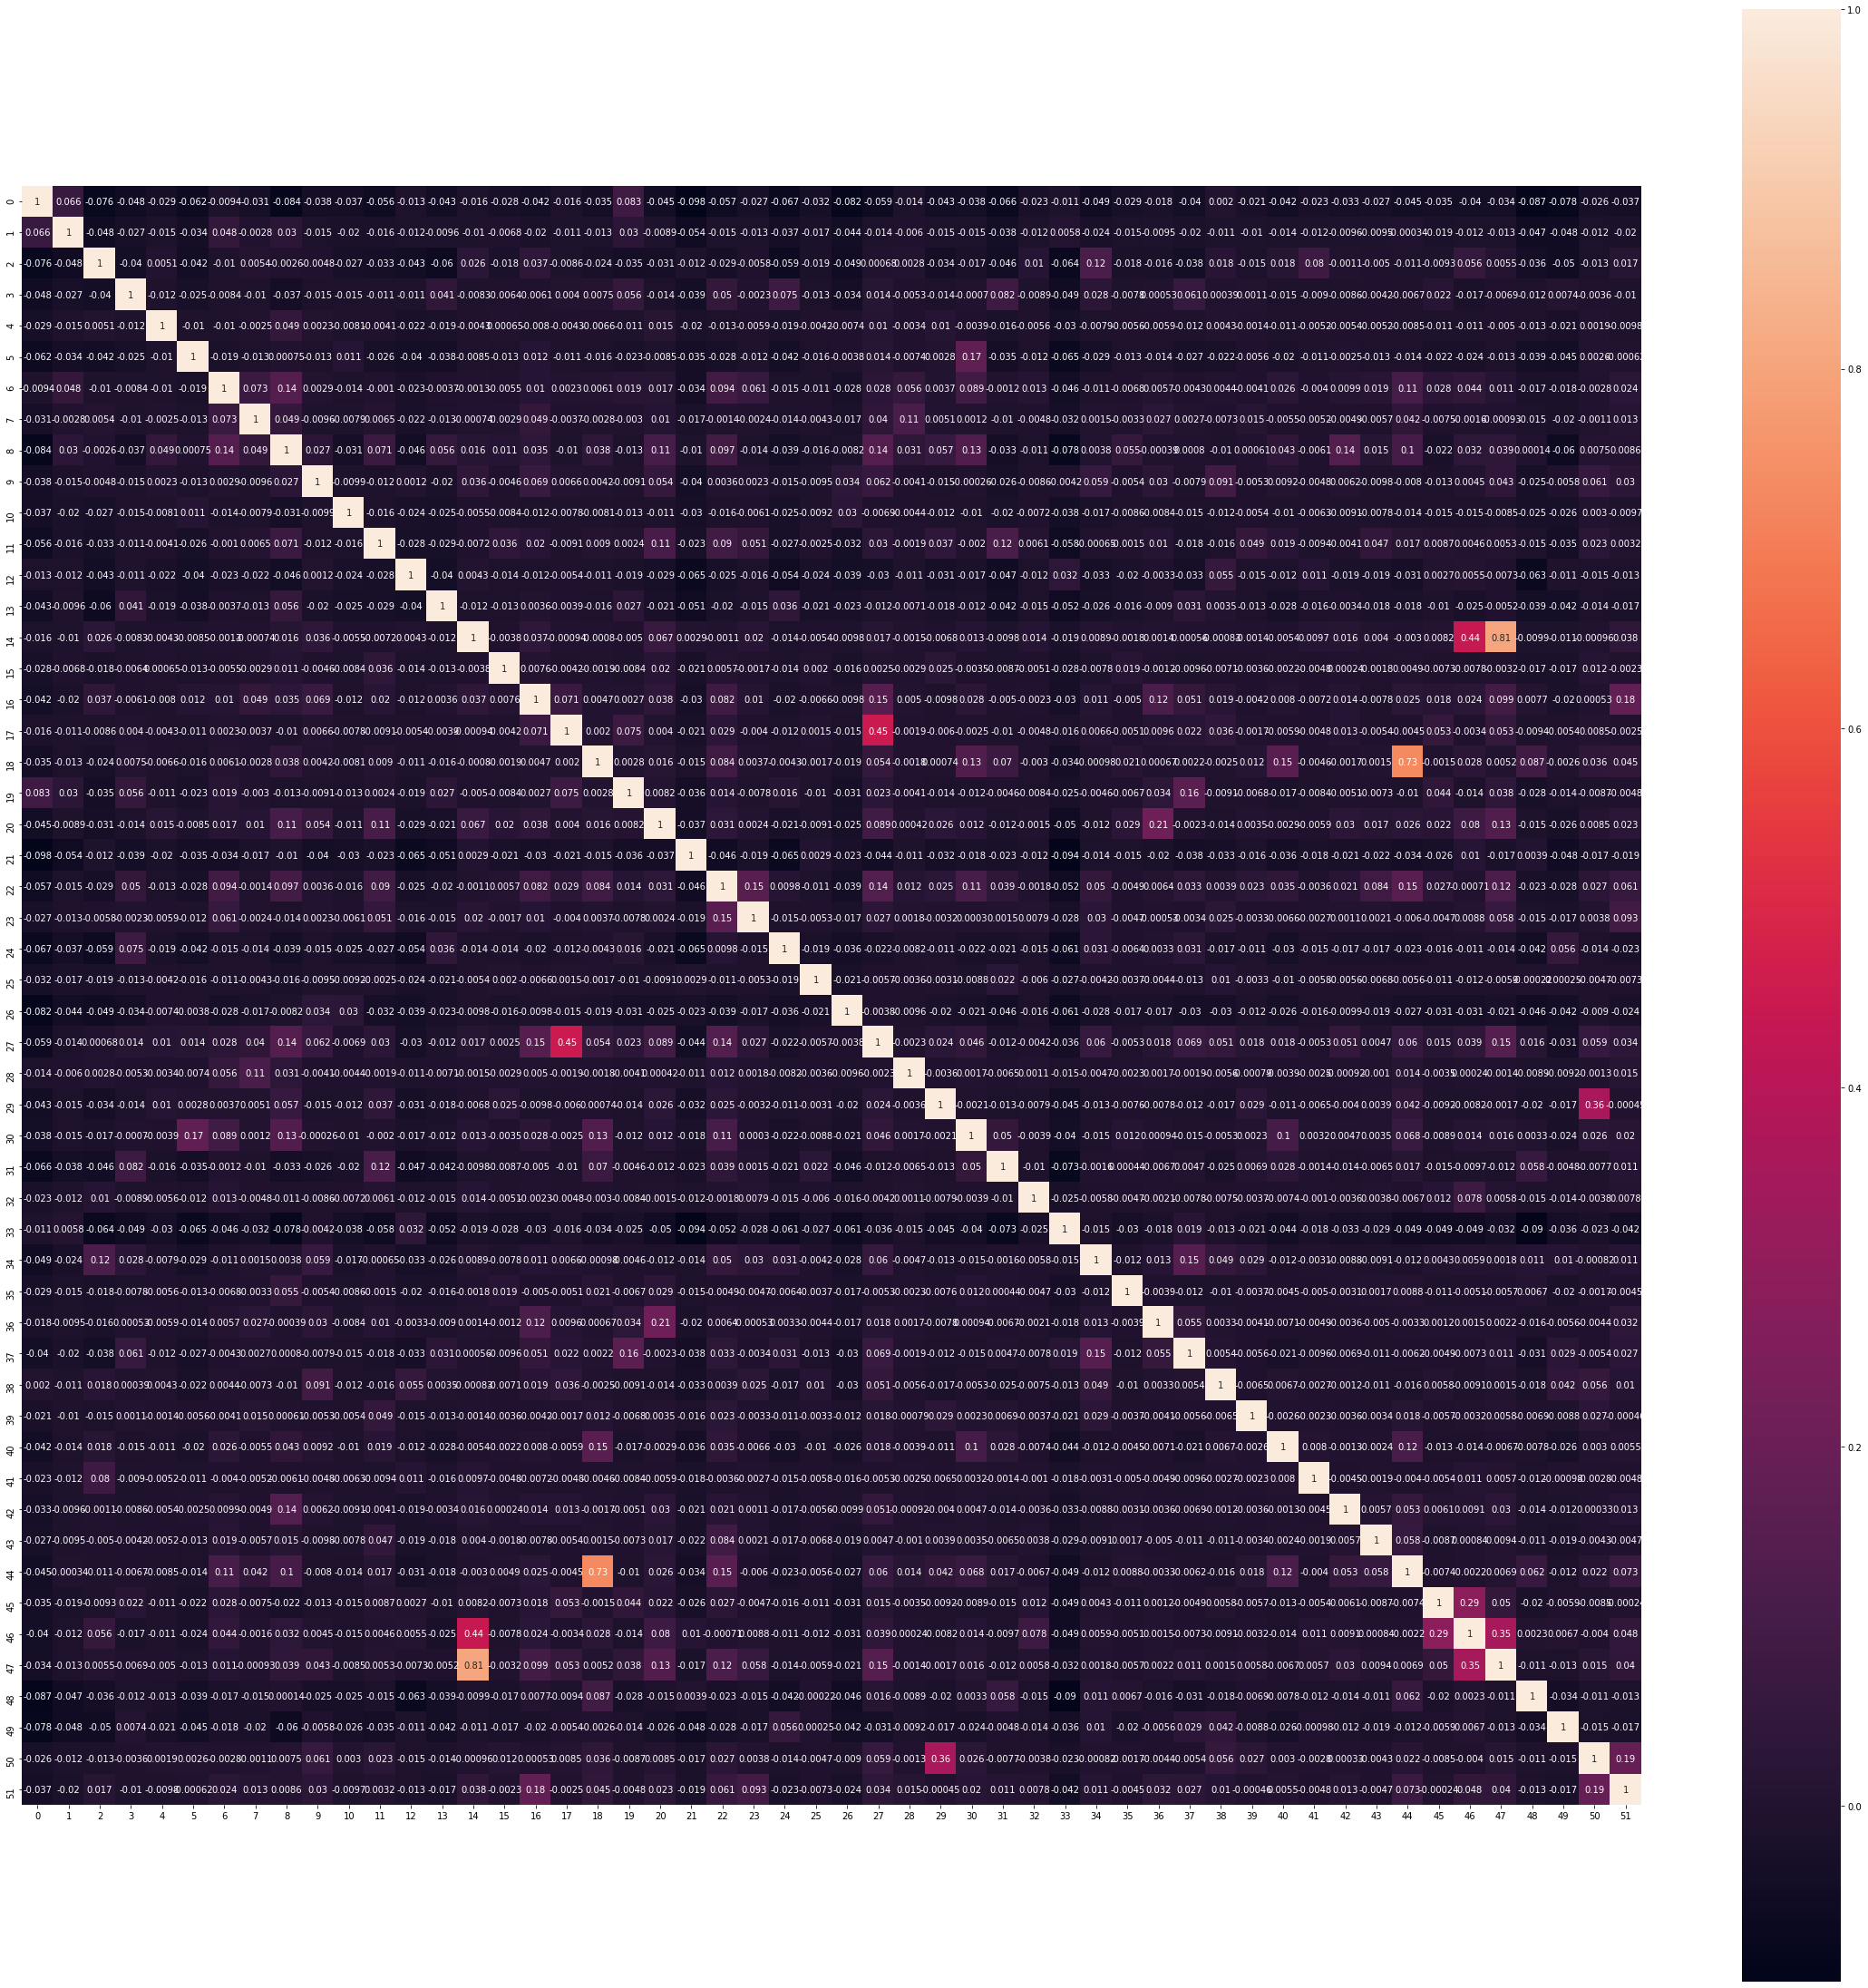

In [52]:
import seaborn as sns
import matplotlib.pyplot as py

Var_Corr = f.iloc[: , :-50]
Var_Corr = Var_Corr.corr()

# plot the heatmap and annotation on it
py.figure(figsize=(40, 40))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True,square=True, )

In [70]:
#f.iloc[:,14:16].head()
f.iloc[:, [14, 42, 47]].head(20)
f.describe([:,[14,47]])

fig, ax = py.subplots(figsize=(50, 40))
py.scatter(f.iloc[:, [14]], f.iloc[:, [47]])
py.show()

SyntaxError: ignored

# Read in `ground-truth.csv`...

In [ ]:
os.chdir('/content/drive/MyDrive/DCUCA684/CA684_Assignment/Dev-set/Ground-truth/')
g = pd.read_csv('ground-truth.csv')
g.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,0.924,34,0.846,13
1,video4.webm,0.923,33,0.667,12
2,video6.webm,0.863,33,0.700,10
3,video8.webm,0.922,33,0.818,11
4,video10.webm,0.950,34,0.900,10


...repurpose `video` column to be the DataFrame index...

In [ ]:
g.set_index('video', inplace=True)
g.index = g.index.str.replace('.webm', '')
g.head()
#d=d.drop(index='count')

,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
video,,,,
video3,0.924,34,0.846,13
video4,0.923,33,0.667,12
video6,0.863,33,0.700,10
video8,0.922,33,0.818,11
video10,0.950,34,0.900,10


# Concatinate the `ground-truth` data onto the `C3D` data

In [ ]:
h = pd.concat([f, g.reindex(f.index)], axis=1)
h.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
video6632,0.010858,0.010386,0.000000,0.000000e+00,0.000000e+00,0.000000,2.700000e-07,0.000000,1.000000e-08,3.400000e-07,8.000000e-08,1.000000e-08,0.000004,0.000105,0.000000e+00,4.000000e-08,1.000000e-08,0.000000,0.000000,1.331800e-04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.600000e-07,0.000000,9.800000e-07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,6.000000e-08,0.000021,5.000000e-08,0.000000e+00,1.000000e-08,3.000000e-08,2.000000e-08,0.000000e+00,...,0.000001,0.000000,0.000000,1.000000e-08,2.500000e-07,0.000000e+00,0.000000,5.000000e-08,0.000000,1.000000e-08,1.000000e-08,4.200000e-07,0.000000e+00,3.000000e-08,2.000000e-08,0.000000,0.000000,0.000000,6.000000e-08,0.000000,0.000000,9.000000e-08,0.000000,0.000000e+00,1.100000e-07,1.400000e-07,0.000000,0.000000,1.700000e-07,0.000000,0.000000e+00,1.000000e-08,1.300000e-06,2.600000e-06,8.000000e-08,NaN,0.884,31,0.900,10
video6634,0.000200,0.000065,0.993807,2.000000e-07,4.700000e-07,0.000073,3.700000e-06,0.000337,6.710000e-06,2.290000e-06,6.380000e-06,7.340000e-06,0.000019,0.000007,3.240000e-06,3.810000e-06,1.411000e-05,0.000001,0.000003,2.300000e-07,1.900000e-07,0.002938,5.200000e-07,9.200000e-07,1.136000e-05,0.000011,3.310400e-04,9.200000e-07,0.000022,8.000000e-08,0.000028,0.000013,5.778000e-05,0.000037,1.683000e-05,6.860000e-06,3.990000e-06,8.030000e-06,1.450000e-06,3.800000e-07,...,0.000138,0.000012,0.000007,4.100000e-07,5.440000e-06,3.400000e-07,0.000007,8.399000e-05,0.000004,3.970000e-06,5.900000e-07,1.285300e-04,8.800000e-07,2.228000e-05,1.105000e-05,0.000003,0.000015,0.000014,4.090000e-06,0.000003,0.000005,4.920000e-06,0.000005,6.400000e-07,2.372000e-05,6.610000e-06,0.000010,0.000002,5.800000e-06,0.000001,1.490000e-06,1.170000e-05,1.500000e-07,8.300000e-07,1.060000e-04,NaN,0.743,33,0.727,11
video6633,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000008,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.999985,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.120000e-06,NaN,0.804,33,0.727,11
video6645,0.005959,0.004765,0.003757,5.787100e-04,7.344000e-05,0.000129,4.665300e-04,0.010266,3.028100e-04,2.196500e-04,2.521800e-04,2.963730e-03,0.000032,0.000592,3.260000e-05,1.466430e-03,2.430700e-04,0.000181,0.004019,2.390960e-03,1.206900e-04,0.008488,5.216200e-04,4.164600e-04,1.643420e-02,0.049686,1.470550e-03,5.432000e-05,0.001055,5.442770e-03,0.000173,0.024688,9.640700e-04,0.000880,1.140529e-02,4.522160e-03,8.594500e-04,6.573000e-04,6.942400e-04,1.823110e-03,...,0.004046,0.000905,0.000997,2.514660e-03,1.587440e-03,1.125030e-03,0.001008,2.133877e-02,0.000647,1.373010e-03,9.568000e-05,5.635083e-02,1.628000e-05,5.379910e-03,6.020020e-03,0.046499,0.023942,0.020658,3.349520e-03,0.002637,0.000094,1.170705e-02,0.000229,9.789210e-03,2.764390e-03,8.052350e-03,0.003992,0.004137,3.670390e-02,0.000767,3.692100e-04,1.251980e-02,8.422000e-05,1.159825e-02,1.155040e-03,NaN,0.692,34,0.667,18
video6643,0.005782,0.000306,0.004011,1.007000e-05,1.034000e-05,0.000002,3.160000e-06,0.000003,1.9

# Let's start modelling!
First, we need to split our data 80/20

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)